In [10]:
!wget https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!dpkg -i cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb

!apt-key add /var/cuda-repo-8-0-local-ga2/7fa2af80.pub
!apt-get update
!apt-get install cuda=8.0.61-1
!apt autoremove

--2021-03-25 21:24:30--  https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
Resolving developer.nvidia.com (developer.nvidia.com)... 152.199.0.24
Connecting to developer.nvidia.com (developer.nvidia.com)|152.199.0.24|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://developer.nvidia.com/compute/cuda/8.0/prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb [following]
--2021-03-25 21:24:30--  https://developer.nvidia.com/compute/cuda/8.0/prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
Reusing existing connection to developer.nvidia.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/8.0/secure/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64.deb?i1_rLWdPGx0ZiRe0w3QbZ-dLp6tNLguwbkX5yJGZeplO7cDSvpB4d4pZBgvDepp2_a8chBhqhCBzTYptY

In [2]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2016 NVIDIA Corporation
Built on Tue_Jan_10_13:22:03_CST_2017
Cuda compilation tools, release 8.0, V8.0.61


In [5]:
import keras; print(keras.__version__)

1.2.2


In [1]:
%tensorflow_version 1.15.0
import numpy as np
import imageio
import matplotlib.pyplot as plt
import os
import sys
import tensorflow as tf
import keras
import random
from tensorflow.keras import datasets, layers, models

physical_devices = tf.config.experimental.list_physical_devices()
print(physical_devices)
# tf.config.experimental.set_memory_growth(physical_devices[-1], True)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.15.0`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'), PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


Using TensorFlow backend.


In [16]:
pip install patool

     |████████████████████████████████| 81kB 6.0MB/s 


In [18]:
tf.__version__
import patoolib
patoolib.extract_archive("./cells.rar", outdir="./")

patool: Extracting ./cells.rar ...
patool: running /usr/bin/unrar x -- /content/cells.rar
patool:     with cwd='./'
patool: ... ./cells.rar extracted to `./'.


'./'

In [16]:

!pip install q keras==2.2.5

     |████████████████████████████████| 337kB 7.5MB/s 
  Found existing installation: Keras 1.1.2
    Uninstalling Keras-1.1.2:
      Successfully uninstalled Keras-1.1.2


In [3]:
pip install -r requirements.txt

In [2]:
tf.__version__
print(keras.__version__)

2.2.5


In [3]:
cat /usr/local/cuda/version.txt

CUDA Version 8.0.61


### Creating arrays with images and masks

In [4]:
directory = os.fsencode("./cells")

images = []
titulos = []

list_directory = os.listdir(directory.decode("utf-8"))

list_directory.sort()
    
for file in list_directory:
    filename = os.fsdecode(file)
    titulos.append(filename)
    filename_path = directory.decode("utf-8") + "/" + filename
    img = imageio.imread(filename_path)
    images.append(img)
    
directory = os.fsencode("./masks")

masks = []
titulos = []

list_directory = os.listdir(directory.decode("utf-8"))

list_directory.sort()
    
for file in list_directory:
    filename = os.fsdecode(file)
    titulos.append(filename)
    filename_path = directory.decode("utf-8") + "/" + filename
    img = imageio.imread(filename_path)[..., 0]
    masks.append(img)
    
masks = np.array(masks)
images = np.array(images)

masks = np.expand_dims(masks, -1)

In [5]:
print(masks.shape)
print(images.shape)

(229, 256, 256, 1)
(229, 256, 256, 3)


### Spliting data between train and test

In [6]:
from sklearn.model_selection import train_test_split
train_images, test_images, train_masks, test_masks = train_test_split(images, masks, test_size=0.2)

### Creating the U-net model

In [11]:
from keras.models import Model, load_model
from keras.layers import Input, Dropout
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.optimizers import Adam
from keras.layers import BatchNormalization

In [12]:
def get_unet(input_img, dropout = 0.1):

    #Contraction path
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (input_img)
    c1 = BatchNormalization() (c1)
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c1)
    c1 = BatchNormalization() (c1)
    p1 = MaxPooling2D((2, 2)) (c1)
    p1 = Dropout(dropout)(p1)

    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (p1)
    c2 = BatchNormalization() (c2)
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c2)
    c2 = BatchNormalization() (c2)
    p2 = MaxPooling2D((2, 2)) (c2)
    p2 = Dropout(dropout)(p2)

    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (p2)
    c3 = BatchNormalization() (c3)
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c3)
    c3 = BatchNormalization() (c3)
    p3 = MaxPooling2D((2, 2)) (c3)
    p3 = Dropout(dropout)(p3)

    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (p3)
    c4 = BatchNormalization() (c4)
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c4)
    c4 = BatchNormalization() (c4)
    p4 = MaxPooling2D(pool_size=(2, 2)) (c4)
    p4 = Dropout(dropout)(p4)
    
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (p4)
    c5 = BatchNormalization() (c5)
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c5)
    c5 = BatchNormalization() (c5)

    #Expantion path
    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (c5)
    u6 = concatenate([u6, c4])
    u6 = Dropout(dropout)(u6)
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (u6)
    c6 = BatchNormalization() (c6)
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c6)
    c6 = BatchNormalization() (c6)

    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c6)
    u7 = concatenate([u7, c3])
    u7 = Dropout(dropout)(u7)
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (u7)
    c7 = BatchNormalization() (c7)
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c7)
    c7 = BatchNormalization() (c7)

    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (u8)
    c8 = BatchNormalization() (c8)
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c8)
    c8 = BatchNormalization() (c8)

    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c8)
    u9 = concatenate([u9, c1])
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (u9)
    c9 = BatchNormalization() (c9)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c9)
    c9 = BatchNormalization() (c9)

    outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)

    model = Model(inputs=[input_img], outputs=[outputs])
    return model

### The metric used to train our model is the Intersection-Over-Union

This metric consists in calculating, for each "class" of the image, the area of overlap between the predicted segmentation and the mask, divided by the union area between the predicted segmentation and the mask. Then the average IOU of the classes is calculated.

In [13]:
from keras import backend as K

##Metrica
def iou_coef(y_true, y_pred, smooth=1):
    intersection = K.sum(K.abs(y_true * y_pred), axis=[1,2,3])
    union = K.sum(y_true,[1,2,3])+K.sum(y_pred,[1,2,3])-intersection
    iou = K.mean((intersection + smooth) / (union + smooth), axis=0)
  
    return iou

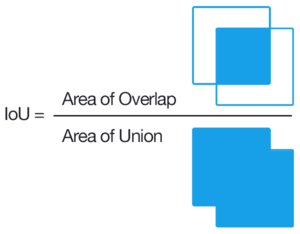

In [ ]:
from IPython.display import Image
Image("../images/iou.png")

## Loss Function: Binary Cross Entropy

In [19]:
input_img = Input((256,256,3))
model = get_unet(input_img, dropout=0.05)
print(train_masks.shape)
model.compile(
        optimizer= Adam(),
        loss= "binary_crossentropy",
        metrics=[iou_coef])
history = model.fit(train_images,
                    train_masks/255,
                    validation_split = 0.1,
                    batch_size = 64,
                    epochs=100)

(183, 256, 256, 1)
Train on 164 samples, validate on 19 samples
Epoch 1/100
164/164 [==============================] - 7s 41ms/step - loss: 0.8140 - iou_coef: 0.0190 - val_loss: 0.7203 - val_iou_coef: 0.0192
Epoch 2/100
164/164 [==============================] - 2s 13ms/step - loss: 0.7491 - iou_coef: 0.0192 - val_loss: 0.7423 - val_iou_coef: 0.0192
Epoch 3/100
164/164 [==============================] - 2s 13ms/step - loss: 0.7174 - iou_coef: 0.0192 - val_loss: 0.7452 - val_iou_coef: 0.0191
Epoch 4/100
164/164 [==============================] - 2s 13ms/step - loss: 0.6980 - iou_coef: 0.0189 - val_loss: 0.7304 - val_iou_coef: 0.0192
Epoch 5/100
164/164 [==============================] - 2s 13ms/step - loss: 0.6809 - iou_coef: 0.0190 - val_loss: 0.7237 - val_iou_coef: 0.0191
Epoch 6/100
164/164 [==============================] - 2s 13ms/step - loss: 0.6663 - iou_coef: 0.0191 - val_loss: 0.7212 - val_iou_coef: 0.0192
Epoch 7/100
164/164 [==============================] - 2s 13ms/step - lo

In [20]:
model.evaluate(test_images, test_masks)

46/46 [==============================] - 0s 6ms/step


[-1.7213851524435955, 1.3910074285838916]

In [21]:
predictions = model.predict(test_images, verbose=1)

46/46 [==============================] - 1s 21ms/step


## Showing Maps // Masks // Predictions

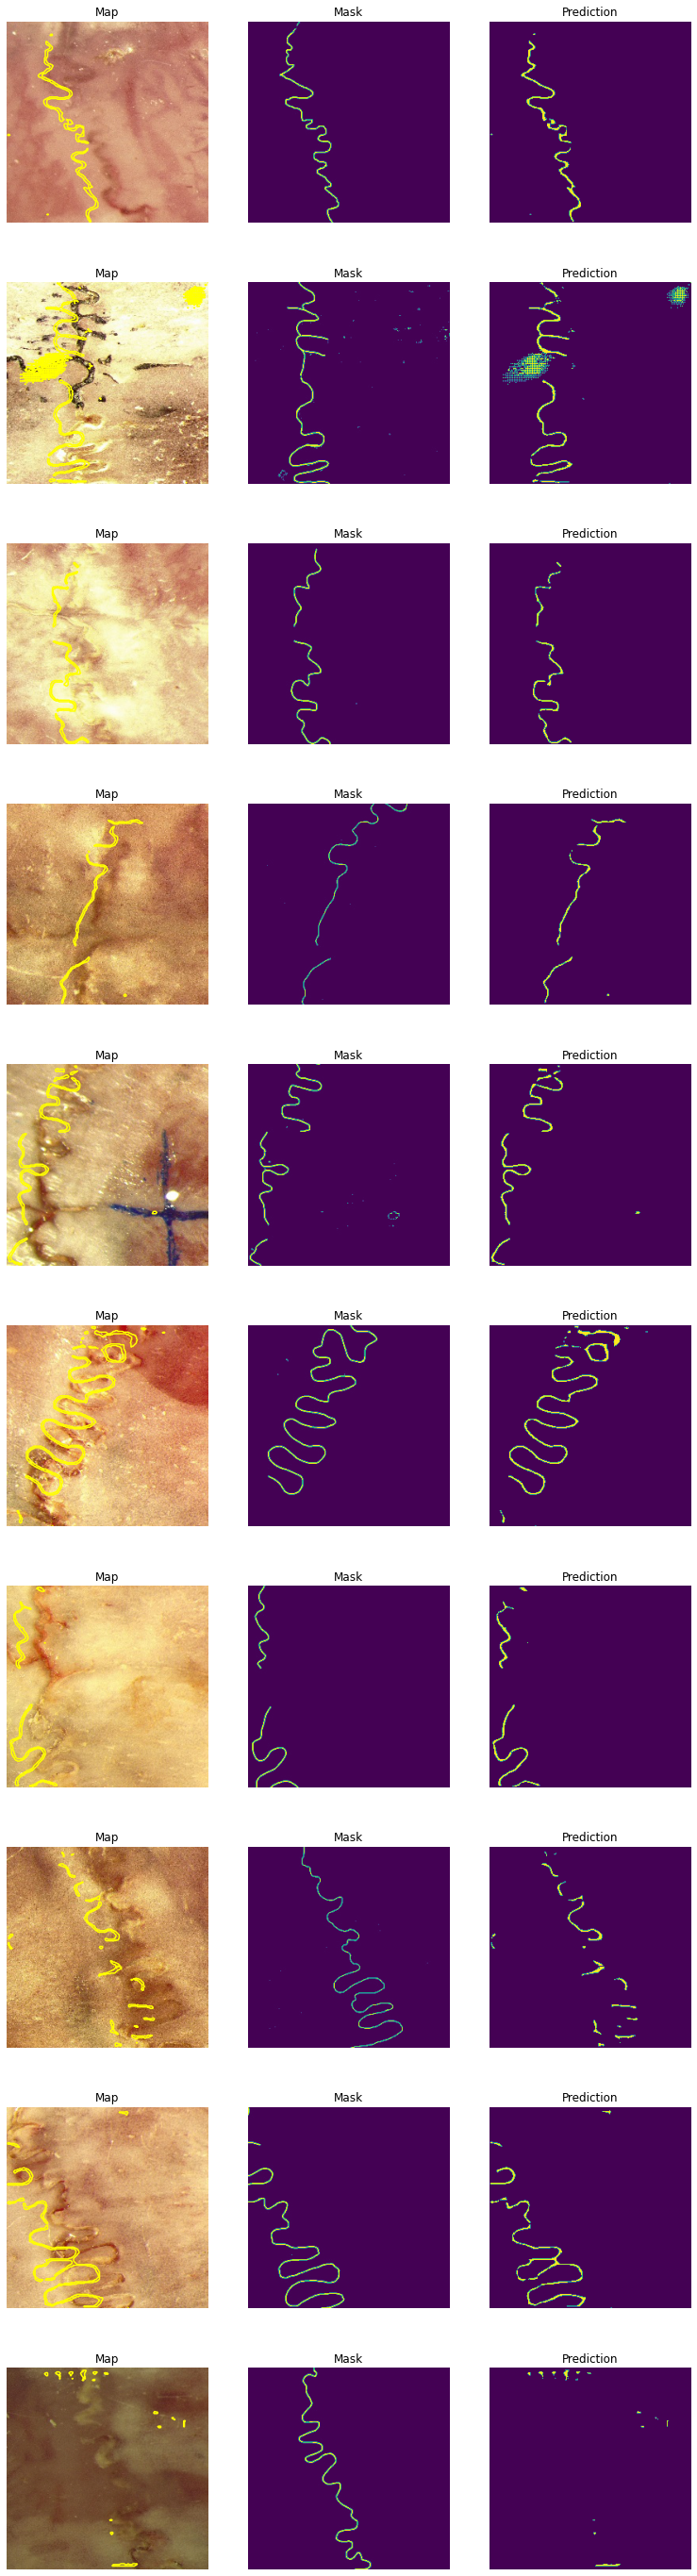

In [22]:
f = plt.figure(figsize=(13,50))
pred = (predictions > 0.5).astype(np.uint8)
j = random.randint(0,50)
for i in range(0,30,3):
    f.add_subplot(10, 3, i+1)
    plt.contour(np.squeeze(pred[j]), colors = 'yellow', levels=[0.5])
    plt.imshow(test_images[j])
    plt.title("Map")
    plt.axis('off')

    f.add_subplot(10, 3, i+2)
    plt.imshow(np.squeeze(test_masks[j]))
    plt.title("Mask")
    plt.axis('off')

    f.add_subplot(10, 3, i+3)
    plt.imshow(np.squeeze(pred[j]))
    plt.title("Prediction")
    plt.axis('off')
    
    j+=1

plt.show()

In [23]:
model.save('my_model.h5') 